# Model : House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
from sklearn import ensemble

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# to find no of columns 
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# shape of dataset
df.shape

(21613, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# to check if we have any null value
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


If we find null values and it is big dataset then and we have very few null values we can remove them

but if we have large no of null values then replace them with mean value

## Data Visualization

<AxesSubplot:xlabel='price', ylabel='Density'>

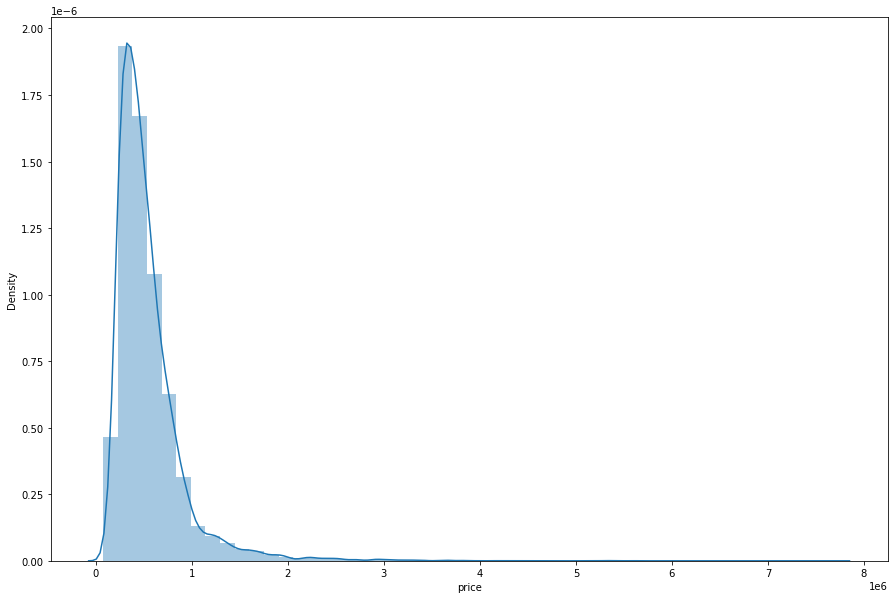

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['price'])

Text(0, 0.5, 'Count')

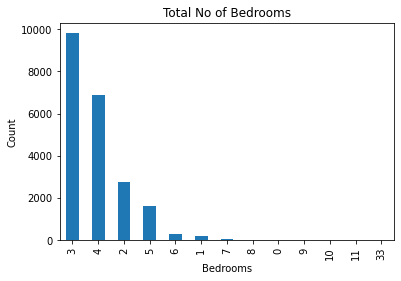

In [12]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('Total No of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

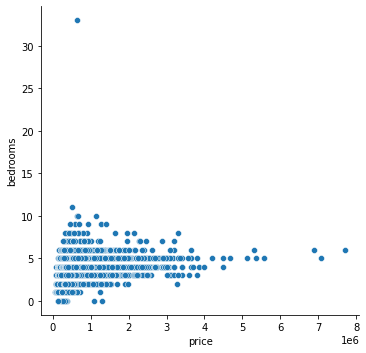

In [13]:
sns.relplot(x='price' ,y='bedrooms' ,data=df)

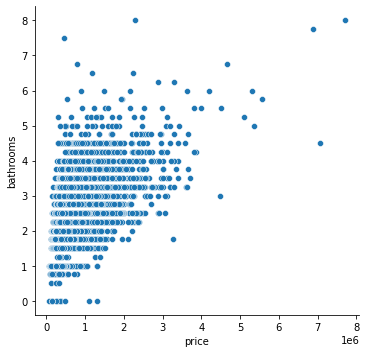

In [14]:
sns.relplot(x='price' ,y='bathrooms' ,data=df)

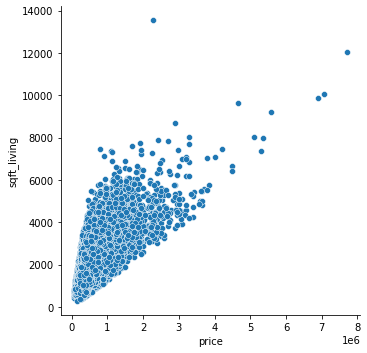

In [15]:
sns.relplot(x='price' ,y='sqft_living' ,data=df)

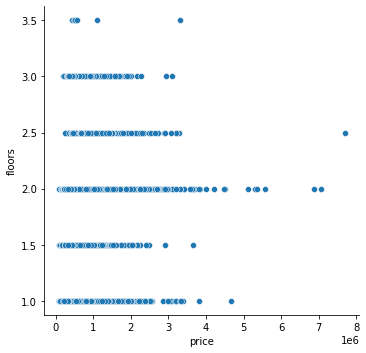

In [16]:
sns.relplot(x='price' ,y='floors' ,data=df)

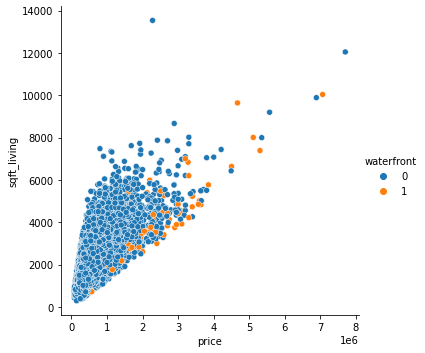

In [17]:
sns.relplot(x='price' ,y='sqft_living', hue ='waterfront' ,data=df)

<AxesSubplot:xlabel='price', ylabel='Density'>

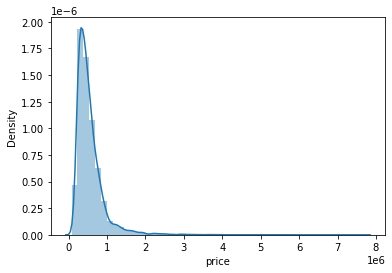

In [18]:
sns.distplot(df['price'])

## Model Creation

In [19]:
#Segrating our data in independent and dependent variables
X = df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']].values
y = df['price'].values


In [20]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

It doesn't matter if the random_state is 0 or 1 or any other integer. What matters is that it should be set the same value, if you want to validate your processing over multiple runs of the code. By the way I have seen random_state=42 used in many official examples of scikit as well as elsewhere also.

random_state as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case. In the documentation, it is stated that:

If random_state is None or np.random, then a randomly-initialized RandomState object is returned.

If random_state is an integer, then it is used to seed a new RandomState object.

If random_state is a RandomState object, then it is passed through.

This is to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code. And unless there is some other randomness present in the process, the results produced will be same as always. This helps in verifying the output.

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(X_train , y_train)

LinearRegression()

In [23]:
# y=mx+c

#to retrieve the intercept
print(reg.intercept_)

#For retrieving the slope:
print(reg.coef_)

7726248.15188377
[-3.59678558e+04  3.98107855e+04  1.13315005e+02  9.72319678e-02
  9.17165471e+03  5.72806911e+05  5.15223111e+04  2.69867684e+04
  9.38983746e+04  7.01584030e+01  4.31566012e+01 -2.59846809e+03
  2.36569924e+01 -5.97926288e+02  6.08814891e+05 -2.16057115e+05
  2.12062598e+01 -3.34013558e-01]


In [24]:
y_pred = reg.predict(X_test)
y_pred

array([ 714313.29153163, 1422462.39996533,  419806.56361416, ...,
        522114.84515205,  174723.95094908,  260992.92524137])

In [25]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,735000.0,7.143133e+05
1,1150000.0,1.422462e+06
2,350500.0,4.198066e+05
3,860000.0,1.288337e+06
4,122000.0,-3.394489e+04
...,...,...
4318,338000.0,4.023099e+05
4319,263000.0,2.421074e+05
4320,397450.0,5.221148e+05
4321,375000.0,1.747240e+05


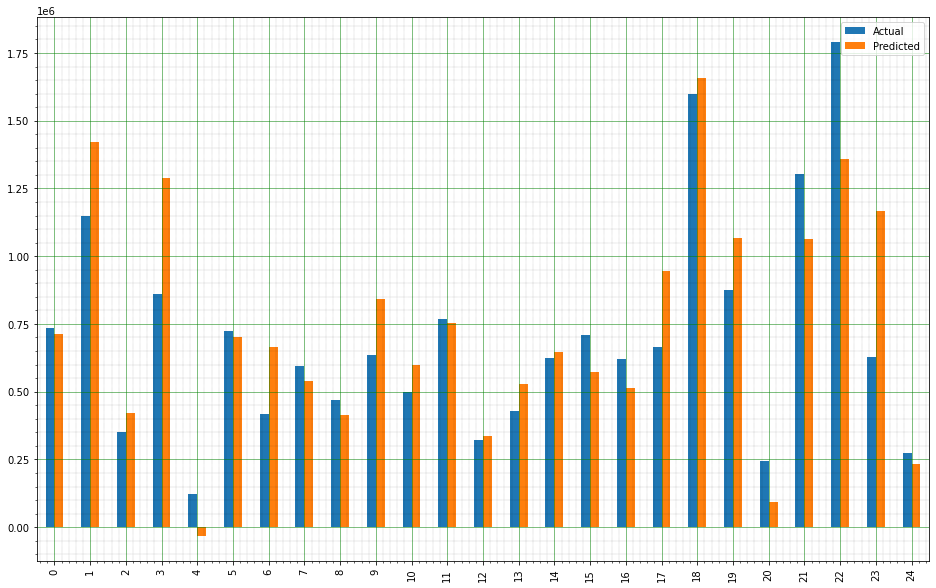

In [26]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))

#major gird will be green in color
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')

#to turn on minor grid lines we have to 1st use a func 
plt.minorticks_on()

#minor gird will be black in color       
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')

plt.show()

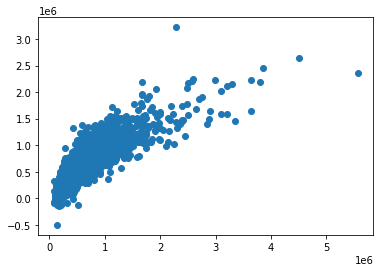

In [27]:
plt.scatter(y_test , y_pred)

<AxesSubplot:ylabel='Density'>

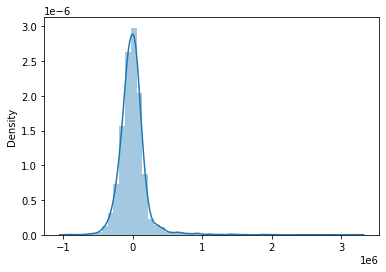

In [28]:
sns.distplot((y_test-y_pred),bins=50)

## Efficiency of Model

In [29]:
reg.score(X_test , y_test)

0.7156152938565626

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

val = metrics.mean_squared_error(y_test, y_pred)

print('Mean Squared Error:',val)  
print('Root Mean Squared Error:', np.sqrt(val))

Mean Absolute Error: 126532.44977149316
Mean Squared Error: 39702436672.084656
Root Mean Squared Error: 199254.7030112079


## Gradient boosting regression

In [31]:
clf = ensemble.GradientBoostingRegressor(n_estimators=500 , max_depth=5,min_samples_split=2,learning_rate=0.2,loss='ls')

We create a variable where we define our gradient boosting regressor and 
set parameters to it 

n_estimator : The number of boosting stages to perform. 
              We should not set it too high which would overfit our model.

max_depth   : The depth of the tree node.

minimum sample split : Number of sample to be split for learning the data
    
learning_rate : Rate of learning the data.

loss :  loss function to be optimized. 
        ‘ls’ refers to least squares regression

In [32]:
clf.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=500)

In [33]:
clf.score(X_test,y_test)

0.8990047191099775